## **Processing Sequences Using RNN and CNN**

In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

## Basic RNNs

In [2]:
# generating dataset
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [9]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000:, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

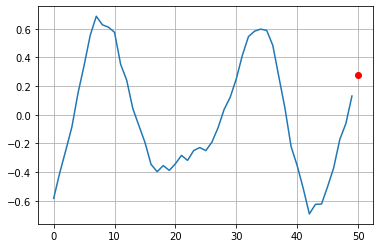

In [15]:
# time series data example, red dot as the target prediction
plt.plot(X_valid[0])
plt.plot(50, y_valid[0], "ro")
plt.grid(True)
plt.show()

### Computing Baselines

In [17]:
# Linear Prediction
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1491 - val_loss: 0.0315
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0113
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0077
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0041

In [18]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 718us/step - loss: 0.0034


0.0033579289447516203

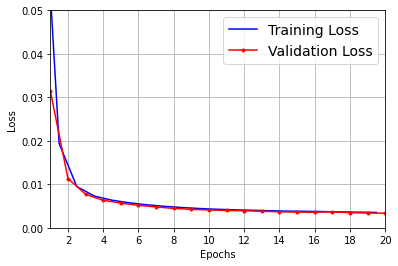

In [21]:
def plot_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss)) + 0.5, loss,  "b-", label="Training Loss")
  plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation Loss")
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
  plt.axis([1, 20, 0, 0.05])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [22]:
# Simple RNN

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.2703 - val_loss: 0.1495
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1255 - val_loss: 0.0598
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0470 - val_loss: 0.0206
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0177 - val_loss: 0.0121
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0117 - val_loss: 0.0110

In [23]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0110


0.011024837382137775

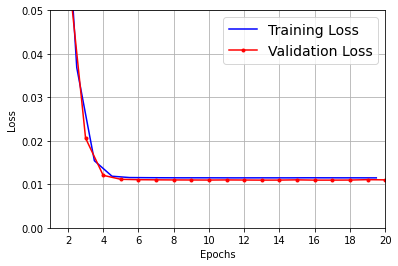

In [25]:
# simple RNN isnt as good as linear model
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [26]:
# Deep RNN
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 7s 24ms/step - loss: 0.0757 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 6/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0030 - val_lo

In [27]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 5ms/step - loss: 0.0028


0.0028326145838946104

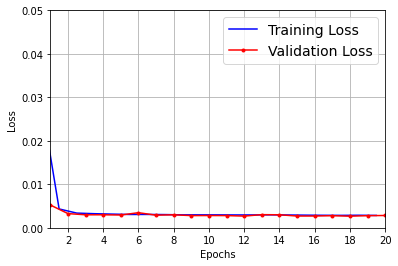

In [28]:
# deep RNN reaches the low point much faster
plot_learning_curves(history.history["loss"], history.history["val_loss"])

In [29]:
## can subsitute last layer with dense layer
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.1076 - val_loss: 0.0063
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0029 - val_lo

In [30]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 4ms/step - loss: 0.0026


0.0025754342786967754

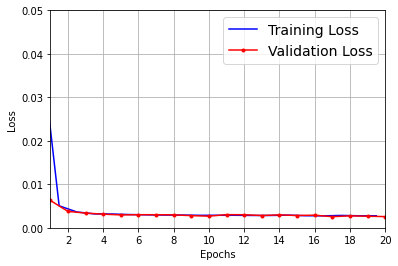

In [31]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

### Forcasting Several Steps Ahead

In [32]:
series = generate_time_series(1, n_steps+10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [33]:
Y_pred.shape

(1, 10, 1)

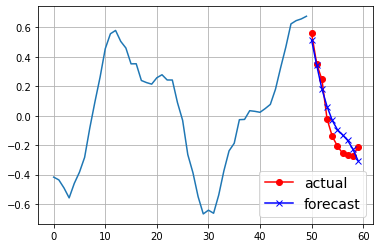

In [40]:
plt.plot(X_new[0, :, 0])
plt.plot(np.arange(50, 60), y_new[0, :, 0], "ro-", label="actual")
plt.plot(np.arange(50, 60), Y_pred[0, :, 0], "bx-", label="forecast")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [43]:
### use this model on a large scale
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [46]:
X = X_valid
for step_ahead in range(10):
  y_pred_one = model.predict(X)[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [52]:
Y_valid.shape, Y_pred.shape

((2000, 10), (2000, 10))

In [53]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.017504262

In [55]:
# compare with linear model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2499 - val_loss: 0.0704
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0612 - val_loss: 0.0464
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0432 - val_loss: 0.0375
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0357 - val_loss: 0.0330
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0301
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0294 - val_loss: 0.0281
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0266
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0256 - val_loss: 0.0253
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0242
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0237

In [56]:
## compare with RNN to predict next 10 values at once
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.0920 - val_loss: 0.0229
Epoch 2/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0202 - val_loss: 0.0160
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0156 - val_loss: 0.0142
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0138 - val_loss: 0.0141
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0123 - val_loss: 0.0119
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0111 - val_loss: 0.0106
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0103 - val_loss: 0.0115
Epoch 10/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0105 - val_lo

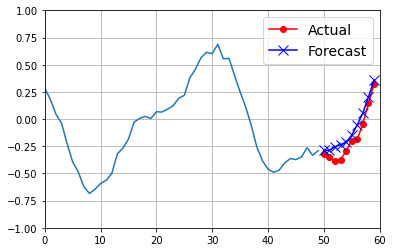

In [60]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plt.plot(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
    plt.grid(True)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [63]:
# this time we let the model to predict the next 10 values at each time step
# to do this use keras.layers.TimeDistributed()

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [64]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [65]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 15ms/step - loss: 0.0765 - last_time_step_mse: 0.0670 - val_loss: 0.0363 - val_last_time_step_mse: 0.0227
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0358 - last_time_step_mse: 0.0227 - val_loss: 0.0331 - val_last_time_step_mse: 0.0202
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0320 - last_time_step_mse: 0.0193 - val_loss: 0.0305 - val_last_time_step_mse: 0.0179
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0297 - last_time_step_mse: 0.0170 - val_loss: 0.0282 - val_last_time_step_mse: 0.0159
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0278 - last_time_step_mse: 0.0156 - val_loss: 0.0253 - val_last_time_step_mse: 0.0127
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0259 - last_time_step_mse: 0.0137 - val_loss: 0.0234 - val_last_time_step_mse: 0.0105
Epoch 7/20
219/219 [==

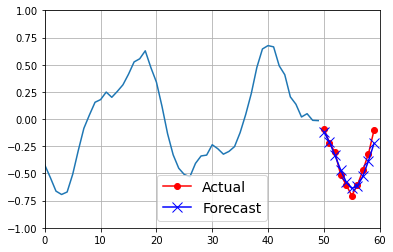

In [66]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### Deep RNN with Batch Norm

In [67]:
from tensorflow.keras.layers import LayerNormalization

class LNSimpleRNNCell(keras.layers.Layer):
  def __init__(self, units, activation="tanh", **kwargs):
    super().__init__(**kwargs)
    self.state_size = units
    self.output_size = units
    self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
    self.layer_norm = LayerNormalization()
    self.activation = keras.activations.get(activation)
  def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
    if inputs is not None:
      batch_size = tf.shape(inputs)[0]
      dtype = inputs.dtype
    return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
  def call(self, inputs, states):
    outputs, new_states = self.simple_rnn_cell(inputs, states)
    norm_outputs = self.activation(self.layer_norm(outputs))
    return norm_outputs, [norm_outputs]

In [68]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 9s 33ms/step - loss: 0.2811 - last_time_step_mse: 0.2682 - val_loss: 0.0694 - val_last_time_step_mse: 0.0575
Epoch 2/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0654 - last_time_step_mse: 0.0560 - val_loss: 0.0571 - val_last_time_step_mse: 0.0461
Epoch 3/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0553 - last_time_step_mse: 0.0451 - val_loss: 0.0494 - val_last_time_step_mse: 0.0382
Epoch 4/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0487 - last_time_step_mse: 0.0388 - val_loss: 0.0446 - val_last_time_step_mse: 0.0333
Epoch 5/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0442 - last_time_step_mse: 0.0336 - val_loss: 0.0423 - val_last_time_step_mse: 0.0319
Epoch 6/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0409 - last_time_step_mse: 0.0307 - val_loss: 0.0394 - val_last_time_step_mse: 0.0283
Epoch 7/20
219/219 [==

### LSTMS

In [69]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 10s 33ms/step - loss: 0.1016 - last_time_step_mse: 0.0918 - val_loss: 0.0544 - val_last_time_step_mse: 0.0344
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0502 - last_time_step_mse: 0.0308 - val_loss: 0.0408 - val_last_time_step_mse: 0.0192
Epoch 3/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0394 - last_time_step_mse: 0.0190 - val_loss: 0.0361 - val_last_time_step_mse: 0.0166
Epoch 4/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0355 - last_time_step_mse: 0.0161 - val_loss: 0.0336 - val_last_time_step_mse: 0.0141
Epoch 5/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0330 - last_time_step_mse: 0.0147 - val_loss: 0.0320 - val_last_time_step_mse: 0.0134
Epoch 6/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0317 - last_time_step_mse: 0.0137 - val_loss: 0.0313 - val_last_time_step_mse: 0.0149
Epoch 7/20
219/219 [=

In [70]:
model.evaluate(X_valid, Y_valid)

63/63 [==============================] - 0s 7ms/step - loss: 0.0238 - last_time_step_mse: 0.0090


[0.02379855327308178, 0.009029457345604897]

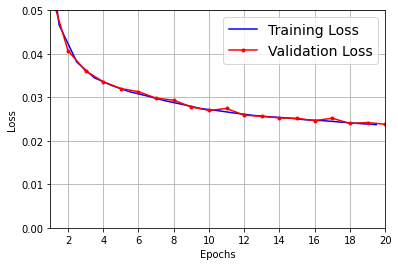

In [71]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

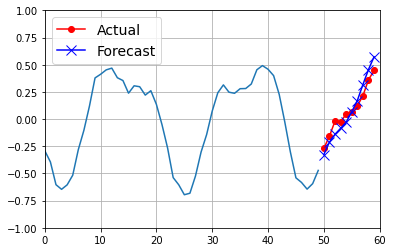

In [72]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### GRU

In [73]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 11s 35ms/step - loss: 0.0968 - last_time_step_mse: 0.0922 - val_loss: 0.0542 - val_last_time_step_mse: 0.0417
Epoch 2/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0519 - last_time_step_mse: 0.0406 - val_loss: 0.0462 - val_last_time_step_mse: 0.0345
Epoch 3/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0445 - last_time_step_mse: 0.0336 - val_loss: 0.0396 - val_last_time_step_mse: 0.0255
Epoch 4/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0381 - last_time_step_mse: 0.0245 - val_loss: 0.0346 - val_last_time_step_mse: 0.0206
Epoch 5/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0338 - last_time_step_mse: 0.0202 - val_loss: 0.0317 - val_last_time_step_mse: 0.0167
Epoch 6/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0311 - last_time_step_mse: 0.0172 - val_loss: 0.0303 - val_last_time_step_mse: 0.0153
Epoch 7/20
219/219 [=

In [74]:
model.evaluate(X_valid, Y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0233 - last_time_step_mse: 0.0097


[0.02325833961367607, 0.009683934971690178]

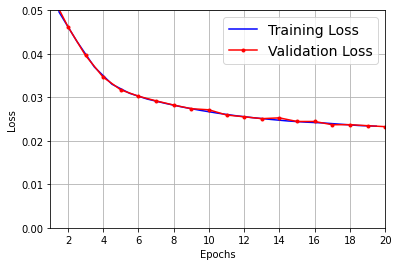

In [75]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

### Using 1D Conv layers to process sequence

In [77]:
# adding a conv layer helps the model to understand seq data better
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, 
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 8s 22ms/step - loss: 0.0869 - last_time_step_mse: 0.0807 - val_loss: 0.0440 - val_last_time_step_mse: 0.0353
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0405 - last_time_step_mse: 0.0332 - val_loss: 0.0353 - val_last_time_step_mse: 0.0280
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0324 - last_time_step_mse: 0.0247 - val_loss: 0.0282 - val_last_time_step_mse: 0.0179
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0274 - last_time_step_mse: 0.0168 - val_loss: 0.0255 - val_last_time_step_mse: 0.0145
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0250 - last_time_step_mse: 0.0140 - val_loss: 0.0242 - val_last_time_step_mse: 0.0134
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0238 - last_time_step_mse: 0.0132 - val_loss: 0.0231 - val_last_time_step_mse: 0.0129
Epoch 7/20
219/219 [==

### WaveNet

In [79]:
## wavenet uses only Conv layers
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
  model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal", activation="relu",
                                dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.0994 - last_time_step_mse: 0.0927 - val_loss: 0.0370 - val_last_time_step_mse: 0.0239
Epoch 2/20
219/219 [==============================] - 3s 11ms/step - loss: 0.0351 - last_time_step_mse: 0.0230 - val_loss: 0.0312 - val_last_time_step_mse: 0.0196
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0306 - last_time_step_mse: 0.0195 - val_loss: 0.0289 - val_last_time_step_mse: 0.0176
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0284 - last_time_step_mse: 0.0176 - val_loss: 0.0276 - val_last_time_step_mse: 0.0166
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0270 - last_time_step_mse: 0.0155 - val_loss: 0.0258 - val_last_time_step_mse: 0.0148
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0260 - last_time_step_mse: 0.0147 - val_loss: 0.0251 - val_last_time_step_mse: 0.0139
Epoch 7/20
219/219 [==

- actual paper uses GatedActivationUnit

### Tackling the SketchRNN Dataset

In [80]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Handson_ML")

In [82]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)


1065304064/1065301781 [==============================] - 33s 0us/step


In [84]:
from pathlib import Path

quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [85]:
train_files

['/root/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [86]:
eval_files

['/root/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010']

In [87]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()
    
with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [88]:
class_names = [name.strip().lower() for name in train_classes]
sorted(class_names)[:10]

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm']

In [90]:
def parse(data_batch):
  feature_descriptions = {
      "ink" : tf.io.VarLenFeature(dtype=tf.float32),
      "shape" : tf.io.FixedLenFeature([2], dtype=tf.int64),
      "class_index" : tf.io.FixedLenFeature([1], dtype=tf.int64)
  }
  examples = tf.io.parse_example(data_batch, feature_descriptions)
  flat_sketches = tf.sparse.to_dense(examples["ink"])
  sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
  lengths = examples["shape"][:, 0]
  labels = examples["class_index"][:, 0]
  return sketches, lengths, labels

In [95]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
  dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=n_read_threads)
  if cache:
    dataset = dataset.cache()
  if shuffle_buffer_size:
    dataset = dataset.shuffle(shuffle_buffer_size)
  dataset = dataset.batch(batch_size)
  dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
  return dataset.prefetch(1)

In [96]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [97]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.03921568 -0.5445545   0.        ]
  [ 0.00392157 -0.21782179  0.        ]
  [ 0.18823531  0.03960396  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.17322835  0.        ]
  [ 0.05333333  0.12598427  0.        ]
  [ 0.07333333  0.06692913  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.14197531 -0.13333333  0.        ]
  [-0.0308642  -0.09411764  0.        ]
  [ 0.         -0.16470587  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[ 0.03921569  0.17596564  0.        ]
  [ 0.03921569  0.3862661   0.        ]
  [ 0.18431374 -0.055794    0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

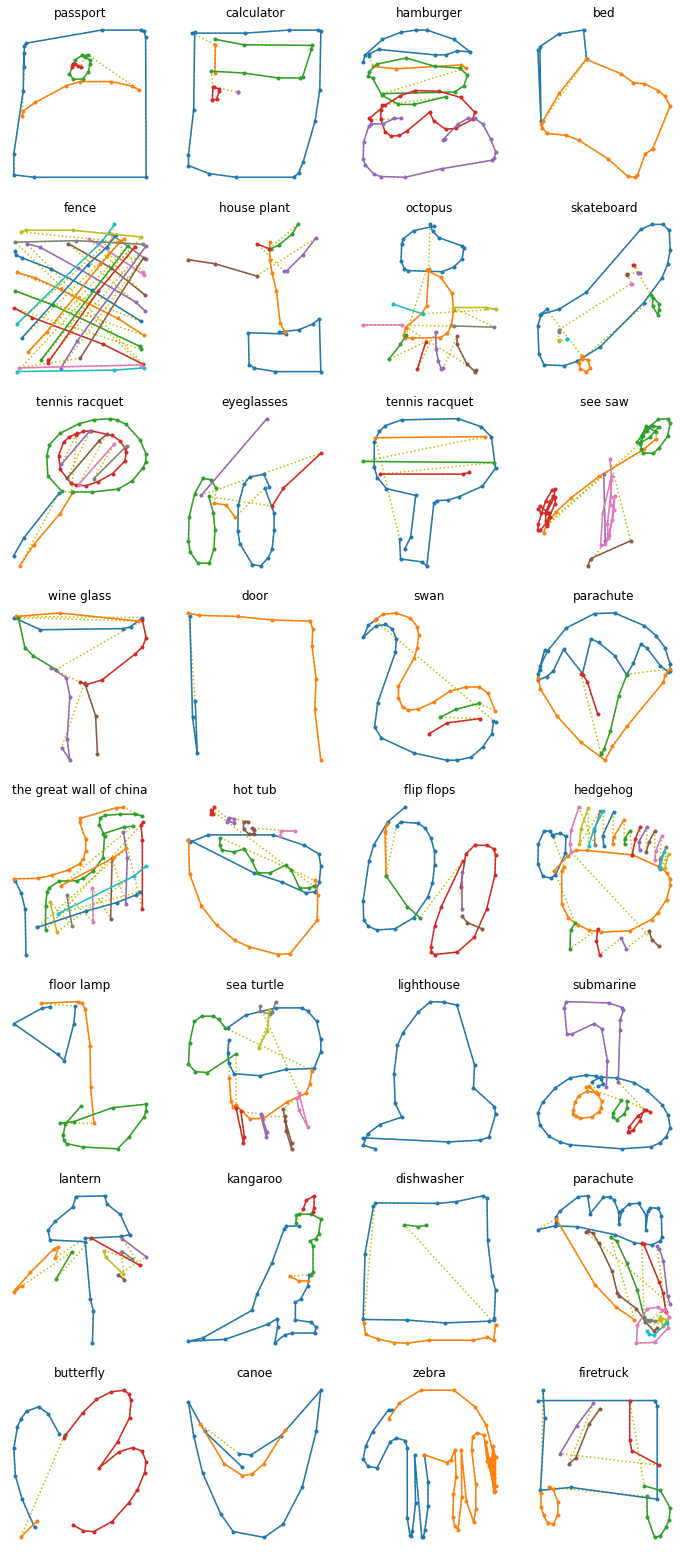

In [98]:
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

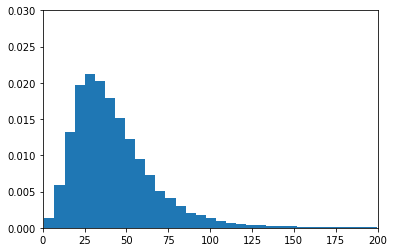

In [101]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.show()

In [102]:
def crop_long_sketches(dataset, max_length=100):
  return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

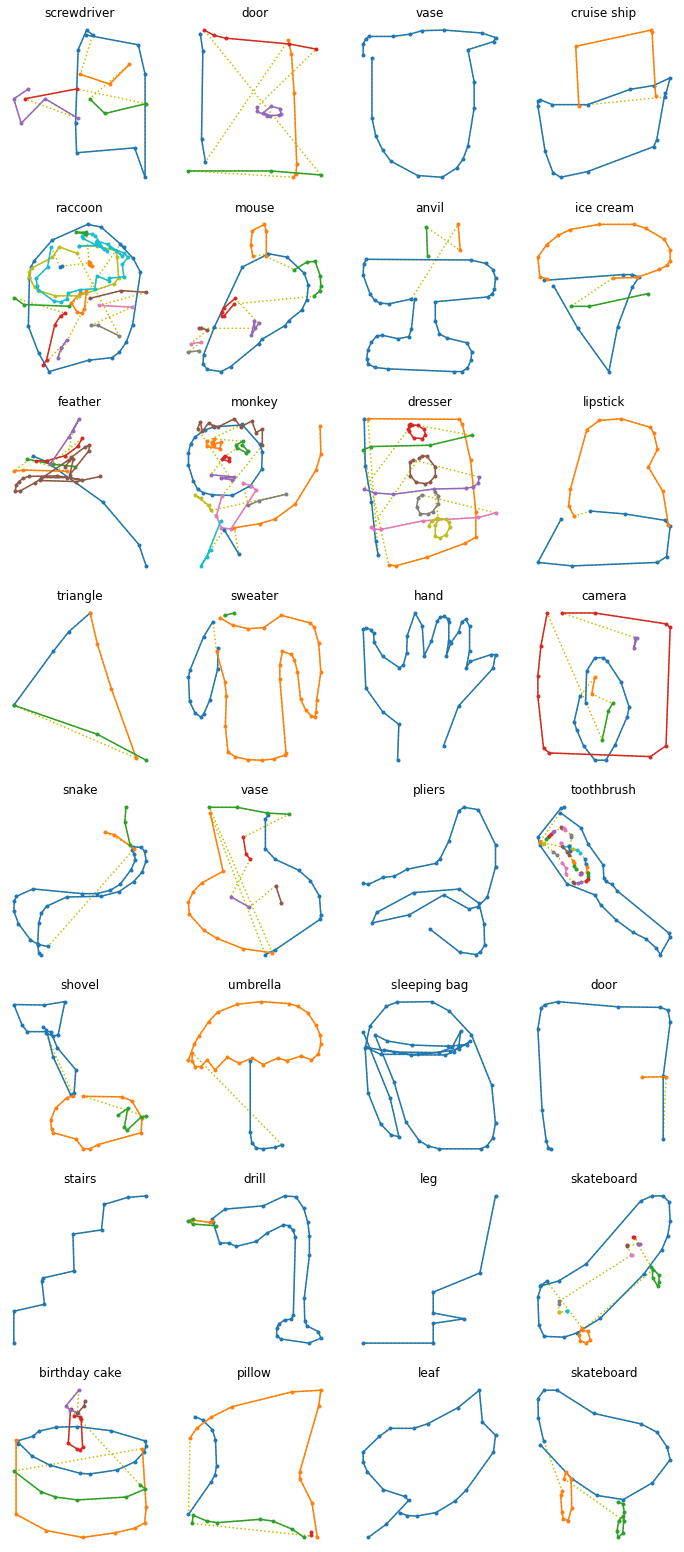

In [103]:
for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

In [105]:
model = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2, validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 3325s 31ms/step - loss: 4.8625 - accuracy: 0.0795 - sparse_top_k_categorical_accuracy: 0.2033 - val_loss: 3.0572 - val_accuracy: 0.3153 - val_sparse_top_k_categorical_accuracy: 0.5995
Epoch 2/2
107813/107813 [==============================] - 3359s 31ms/step - loss: 2.8804 - accuracy: 0.3468 - sparse_top_k_categorical_accuracy: 0.6354 - val_loss: 2.4449 - val_accuracy: 0.4277 - val_sparse_top_k_categorical_accuracy: 0.7167


In [106]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

In [107]:
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

0.60453373

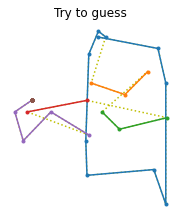

Top-5 predictions:
   1.  flashlight 10.736%
   2.  crayon 9.083%
   3.  lighthouse 7.507%
   4.  syringe 5.728%
   5.  toothpaste 4.702%
Answer: screwdriver


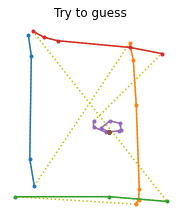

Top-5 predictions:
   1.  door 36.669%
   2.  triangle 14.545%
   3.  skyscraper 6.672%
   4.  tent 3.404%
   5.  hourglass 2.395%
Answer: door


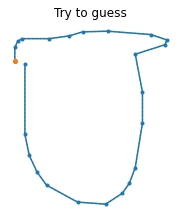

Top-5 predictions:
   1.  diamond 16.443%
   2.  octagon 12.100%
   3.  vase 10.305%
   4.  hexagon 9.613%
   5.  cup 9.566%
Answer: vase


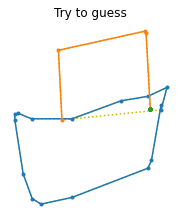

Top-5 predictions:
   1.  cruise ship 37.581%
   2.  sailboat 13.325%
   3.  knife 6.733%
   4.  aircraft carrier 6.115%
   5.  canoe 5.861%
Answer: cruise ship


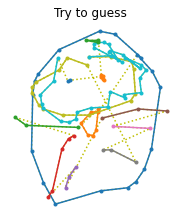

Top-5 predictions:
   1.  soccer ball 26.258%
   2.  brain 20.020%
   3.  fan 14.240%
   4.  beard 6.434%
   5.  goatee 3.353%
Answer: raccoon


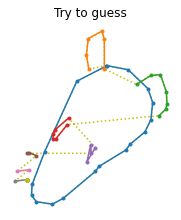

Top-5 predictions:
   1.  remote control 10.234%
   2.  mouse 9.804%
   3.  strawberry 6.599%
   4.  cactus 6.141%
   5.  cat 6.010%
Answer: mouse


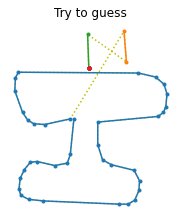

Top-5 predictions:
   1.  wine glass 28.923%
   2.  anvil 12.269%
   3.  key 7.475%
   4.  giraffe 4.874%
   5.  toilet 4.454%
Answer: anvil


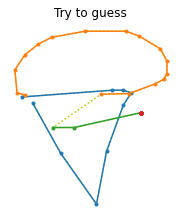

Top-5 predictions:
   1.  ice cream 72.854%
   2.  lollipop 11.475%
   3.  mushroom 4.539%
   4.  microphone 2.931%
   5.  umbrella 2.261%
Answer: ice cream


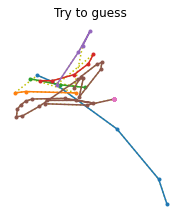

Top-5 predictions:
   1.  feather 22.810%
   2.  carrot 16.150%
   3.  house plant 12.359%
   4.  palm tree 8.435%
   5.  campfire 5.980%
Answer: feather


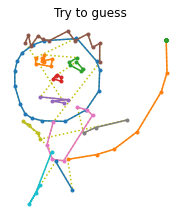

Top-5 predictions:
   1.  monkey 18.688%
   2.  owl 10.699%
   3.  bear 9.205%
   4.  frog 7.760%
   5.  dog 3.952%
Answer: monkey


In [109]:
n_new = 10
Y_probas = model.predict(sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
  plt.figure(figsize=(3, 3.5))
  draw_sketch(sketches[index])
  plt.show()
  print("Top-5 predictions:".format(index + 1))
  for k in range(5):
    class_name = class_names[top_k.indices[index, k]]
    proba = 100 * top_k.values[index, k]
    print("   {}.  {} {:.3f}%".format(k+1, class_name, proba))
  print("Answer: {}".format(class_names[labels[index].numpy()]))